<a href="https://colab.research.google.com/github/JonathanJuradoS/Clasificacion_2/blob/main/CASO_03_student_dropout_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso: Student Dropout

## Descripción
Este caso simula un escenario realista relacionado con student dropout. Utiliza un dataset de 2000 registros con 10 características simuladas.

## Objetivo
Aplicar y comparar los modelos de clasificación: SVM, KNN, Árboles de Decisión y Boosting, para evaluar su desempeño en este contexto específico. Se utilizarán métricas como Accuracy, F1-Score y AUC-ROC.


### Paso 1: Importar librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score

### Paso 2: Cargar y explorar el dataset

In [2]:
df = pd.read_csv("/content/student_dropout.csv")
print("Primeros registros del dataset:")
print(df.head())

Primeros registros del dataset:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.903871  -2.527516  -3.625867   0.849043   2.235963  -3.930622   
1   0.251078   1.374052   2.122281   2.737115   4.984152   3.682638   
2   2.516704   1.296562  -2.271195   1.080906   2.217188   0.670198   
3  -3.968565  -3.647232  -0.130904   0.897873   0.359114  -1.252290   
4   3.558462  -2.578237  -2.660530   0.036379   2.361515  -1.871070   

   feature_7  feature_8  feature_9  feature_10  target  
0  -0.330609   1.239762  -0.581444   -0.522594       0  
1  -0.052867  -1.366494  -1.817972    1.431686       0  
2  -1.290362  -1.395746  -2.321588   -1.130719       0  
3  -0.409085   5.727101  -1.726212    1.963714       1  
4  -0.018120   0.115209   0.507098    0.515180       0  


### Paso 3: Separar variables predictoras (X) y variable objetivo (y), y dividir en entrenamiento y prueba

In [3]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Paso 4: Normalizar las variables predictoras para evitar sesgo por escala

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Paso 5: Definir y entrenar los modelos de clasificación

In [5]:
models = {
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Boosting": GradientBoostingClassifier()
}

### Paso 6: Evaluar el desempeño de cada modelo

In [6]:
for model_name, model in models.items():
    print(f"\n\033[1mModelo: {model_name}\033[0m")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        roc = roc_auc_score(y_test, y_prob)
        print(f"AUC-ROC: {roc:.2f}")
    print("F1-Score:", f1_score(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))


Modelo: SVM
AUC-ROC: 0.98
F1-Score: 0.9592169657422512
Accuracy: 0.9583333333333334
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       286
           1       0.98      0.94      0.96       314

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600


Modelo: KNN
AUC-ROC: 0.98
F1-Score: 0.9528455284552846
Accuracy: 0.9516666666666667
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       286
           1       0.97      0.93      0.95       314

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600


Modelo: Decision Tree
AUC-ROC: 0.88
F1-Score: 0.8870967741935484
Accuracy: 0.8833333333333333
Reporte de Clasificación:
   

### Paso 7: Visualizar la Matriz de Confusión para cada modelo

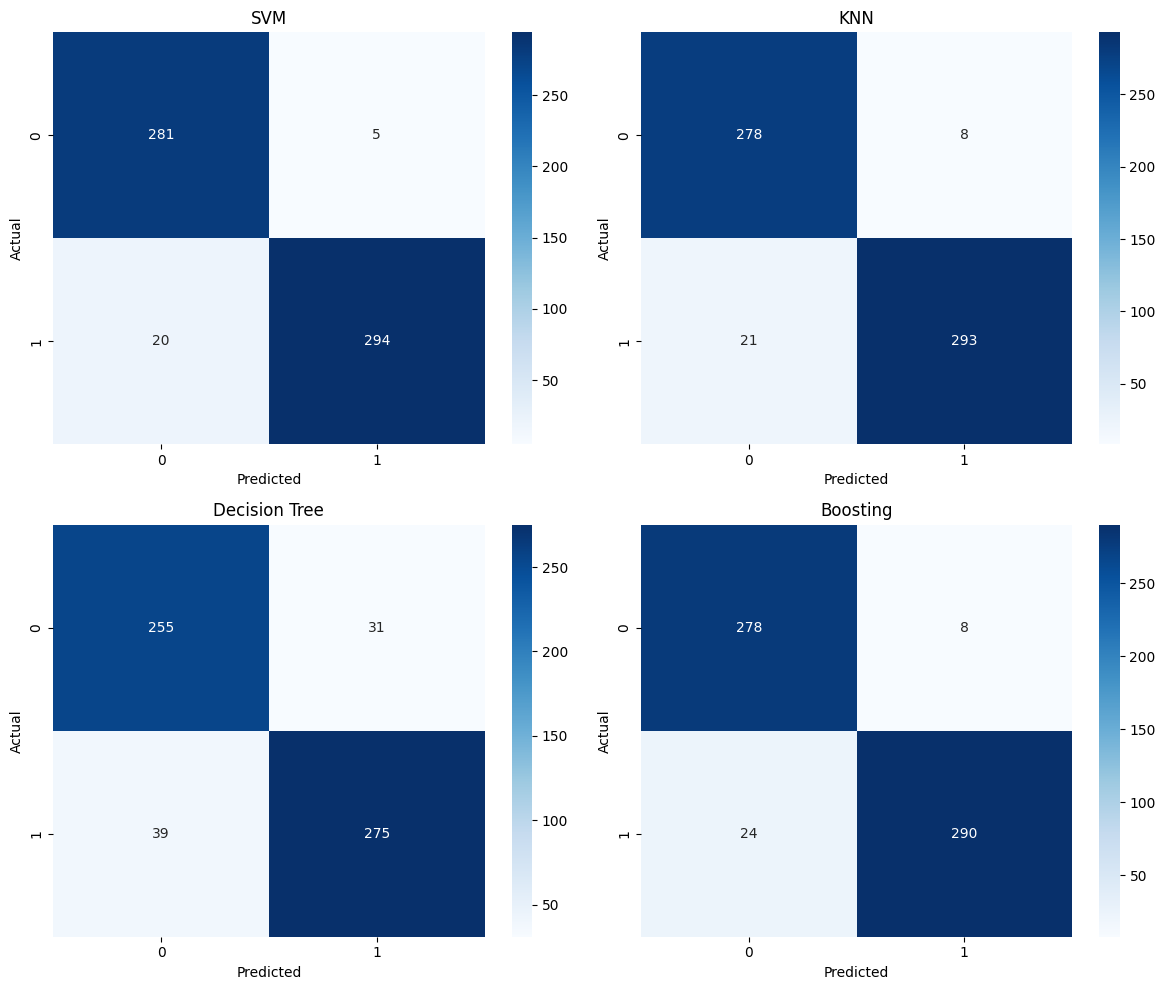

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
for ax, (model_name, model) in zip(axes.ravel(), models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues")
    ax.set_title(f"{model_name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

### Paso 8: Graficar la curva ROC para comparar capacidad discriminativa

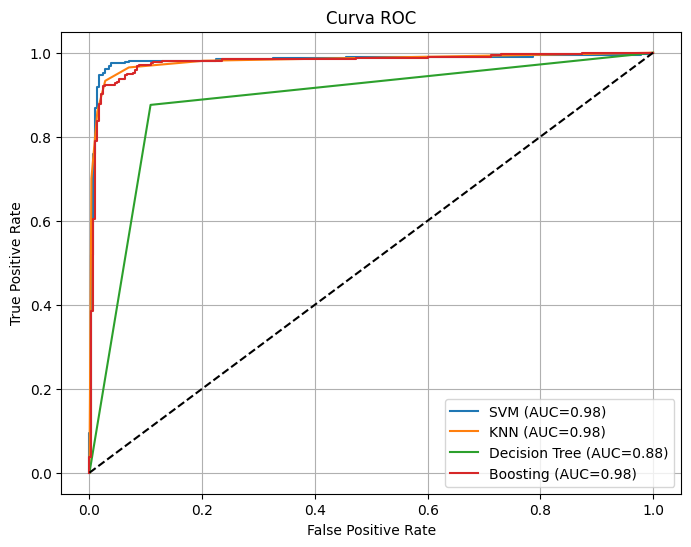

In [8]:
plt.figure(figsize=(8,6))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()

## Conclusiones del Caso: Student Dropout
- **SVM** demostró buena precisión y generalización con fronteras complejas.
- **KNN** fue fácil de implementar, pero sensible a la escala y al valor de K.
- **Árboles de Decisión** fueron interpretables pero propensos al sobreajuste.
- **Boosting (Gradient Boosting)** mostró mejor desempeño general a costa de más tiempo de entrenamiento.

Se recomienda seleccionar el modelo en función del objetivo del negocio y del balance entre precisión y complejidad.
